In [ ]:
# Copyright (c) Meta Platforms, Inc. and affiliates.
# All rights reserved.

# This source code is licensed under the license found in the
# LICENSE file in the root directory of this source tree.

import json
import numpy as np
from matplotlib import pyplot as plt

import pandas as pd
import numpy as np

import os
import json

outputs/nq_open/Meta-Llama-3.1-8B-Instruct/sentence/val/questions_certain_lu_1_trivia_qa_range(15,32)_0.25.json 311
outputs/nq_open/Meta-Llama-3.1-8B-Instruct/sentence/val/questions_certain_lu_1_trivia_qa_range(15,32)_0.5.json 311
outputs/nq_open/Meta-Llama-3.1-8B-Instruct/sentence/val/questions_certain_lu_1_trivia_qa_range(15,32)_0.75.json 311
outputs/nq_open/Meta-Llama-3.1-8B-Instruct/sentence/val/questions_certain_lu_1_trivia_qa_range(15,32)_1.0.json 311
outputs/pop_qa/Meta-Llama-3.1-8B-Instruct/sentence/val/questions_certain_lu_1_trivia_qa_range(15,32)_0.25.json 139
outputs/pop_qa/Meta-Llama-3.1-8B-Instruct/sentence/val/questions_certain_lu_1_trivia_qa_range(15,32)_0.5.json 139
outputs/pop_qa/Meta-Llama-3.1-8B-Instruct/sentence/val/questions_certain_lu_1_trivia_qa_range(15,32)_0.75.json 139
outputs/pop_qa/Meta-Llama-3.1-8B-Instruct/sentence/val/questions_certain_lu_1_trivia_qa_range(15,32)_1.0.json 139
outputs/nq_open/Mistral-7B-Instruct-v0.3/sentence/val/questions_certain_lu_1_tri

outputs/nq_open/Mistral-7B-Instruct-v0.3/sentence/val/questions_certain_lu_1_trivia_qa_range(15,32)_1.0.json 579
outputs/pop_qa/Mistral-7B-Instruct-v0.3/sentence/val/questions_certain_lu_1_trivia_qa_range(15,32)_0.25.json 487
outputs/pop_qa/Mistral-7B-Instruct-v0.3/sentence/val/questions_certain_lu_1_trivia_qa_range(15,32)_0.5.json 487
outputs/pop_qa/Mistral-7B-Instruct-v0.3/sentence/val/questions_certain_lu_1_trivia_qa_range(15,32)_0.75.json 487
outputs/pop_qa/Mistral-7B-Instruct-v0.3/sentence/val/questions_certain_lu_1_trivia_qa_range(15,32)_1.0.json 487
outputs/nq_open/Qwen2.5-7B-Instruct/sentence/val/questions_certain_lu_1_trivia_qa_range(16,28)_0.25.json 260
outputs/nq_open/Qwen2.5-7B-Instruct/sentence/val/questions_certain_lu_1_trivia_qa_range(16,28)_0.5.json 260
outputs/nq_open/Qwen2.5-7B-Instruct/sentence/val/questions_certain_lu_1_trivia_qa_range(16,28)_0.75.json 260
outputs/nq_open/Qwen2.5-7B-Instruct/sentence/val/questions_certain_lu_1_trivia_qa_range(16,28)_1.0.json 260
out

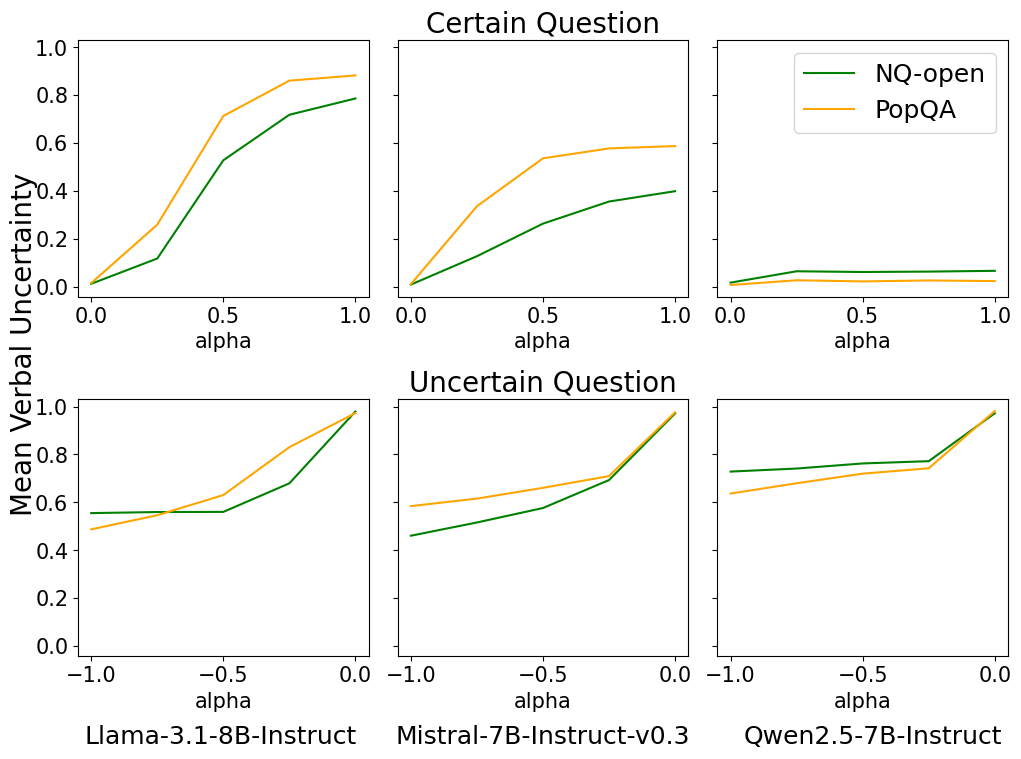

In [ ]:
dataset_names = ['trivia_qa', 'nq_open', 'pop_qa']
model_names = ['Meta-Llama-3.1-8B-Instruct', 'Mistral-7B-Instruct-v0.3', 'Qwen2.5-7B-Instruct'] 
# model_names = ['Qwen2.5-7B-Instruct', 'Meta-Llama-3.1-8B-Instruct', 'llama-3.1-8B-grpo']
prompt_type = 'sentence'
COLORS = {'trivia_qa': 'blue', 'nq_open': 'green', 'pop_qa': 'orange'}
DATASETS = {'trivia_qa': 'TriviaQA', 'nq_open': 'NQ-open', 'pop_qa': 'PopQA'}
iti_method = 1
dataset2 = 'trivia_qa'
fig, ax = plt.subplots(2, 3, figsize=(12, 8), sharey=True) # certain uncertain three models
# adjust the space between subplots
plt.subplots_adjust(hspace=0.1, wspace=0.1)
for model_i, model_name in enumerate(model_names):
    for i, dataset in enumerate(dataset_names):
        full_dataset = DATASETS[dataset]
        color = COLORS[dataset]
        if iti_method == 1 and dataset == 'trivia_qa':
            continue
        output_dir = f"outputs/{dataset}/{model_name}/{prompt_type}/val"
        if model_name == 'Meta-Llama-3.1-8B-Instruct':
            results_df = pd.read_csv(f"../datasets/{dataset}/sampled/val.csv")
        else:
            results_df = pd.read_csv(f"../datasets/{dataset}/{model_name}/val.csv")
        # data = pd.read_csv(f"../datasets/{dataset}/{model_name}_sentence/val.csv")
        
        vufa_alphas = np.arange(0, 1.25, 0.25).tolist()
        vufa_alphas2 = np.arange(-1, 0.1, 0.25).tolist()
        if 'Llama' in model_name:
            str_process_layers = 'range(15,32)'
        elif 'Qwen' in model_name:
            str_process_layers = 'range(16,28)'
        elif 'Mistral' in model_name:
            str_process_layers = 'range(15,32)'
        elif 'llama' in model_name:
            str_process_layers = 'range(20,32)'
        # assert len(results_df) == len(data)
        # results_df['model_generated'] = data['model_generated']
        vu_scores_llm = results_df['verbal_uncertainty'].to_numpy()
        # use threshold
        verbal_uncertain_idx = np.array([
            i for i in range(len(results_df))
            if vu_scores_llm[i] >= 0.9
        ])
        verbal_certain_idx = np.array([
            i for i in range(len(results_df))
            if  vu_scores_llm[i] <= 0.05
        ])
        certain_vu = np.mean(vu_scores_llm[verbal_certain_idx])
        uncertain_vu = np.mean(vu_scores_llm[verbal_uncertain_idx])
        

        # certain 
        all_mean_vu, alphas = [], []
        
        for alpha in vufa_alphas:
            alpha = round(alpha, 2)
            if alpha == 0:
                alphas.append(alpha)
                all_mean_vu.append(certain_vu)
                continue
            if iti_method ==2:
                file = f"{output_dir}/questions_certain_vu_{iti_method}_{str_process_layers}_{alpha}.json"
            else:
                file = f"{output_dir}/questions_certain_vu_{iti_method}_{dataset2}_{str_process_layers}_{alpha}.json"
            try:
                all_vus = []
                with open(file) as f:
                    vu = json.load(f)
                    print(file, len(vu))
                for vu_q in vu.values():
                    all_vus.extend(vu_q)
                all_vus = [x for x in all_vus if x != -1]
                mean_vu = np.mean(all_vus)
                all_mean_vu.append(mean_vu)
                alphas.append(alpha)
            except Exception as e:
                print(f"no file {file}", e)
        if model_i == 1:
            ax[0][model_i].set_title('Certain Question', fontsize=20)
        ax[0][model_i].set_xlabel("alpha", fontsize=15)
        ax[0][model_i].plot(alphas, all_mean_vu, label=full_dataset, color=color)
        ax[0][model_i].tick_params(axis='x', labelsize=15)
        ax[0][model_i].tick_params(axis='y', labelsize=15)
        # ax[0][model_i].set_ylabel('Mean Verbal Uncertainty', fontsize=16)
        # ax[0][model_i].legend()

        all_mean_vu, alphas = [], []
        
        for alpha in vufa_alphas2:
            alpha = round(alpha, 2)
            if alpha == 0:
                alphas.append(alpha)
                all_mean_vu.append(uncertain_vu)
                continue    
            if iti_method ==2:
                file = f"{output_dir}/questions_uncertain_vu_{iti_method}_{str_process_layers}_{alpha}.json"
            else:
                file = f"{output_dir}/questions_uncertain_vu_{iti_method}_{dataset2}_{str_process_layers}_{alpha}.json"
            if os.path.exists(file):
                all_vus = []
                with open(file) as f:
                    vu = json.load(f)
                for vu_q in vu.values():
                    all_vus.extend(vu_q)
                mean_vu = np.mean(all_vus)
                all_mean_vu.append(mean_vu)
                alphas.append(alpha)
        if model_i == 1:
            ax[1][model_i].set_title('Uncertain Question', fontsize=20)
        ax[1][model_i].set_xlabel("alpha", fontsize=15)
        ax[1][model_i].plot(alphas, all_mean_vu, label=dataset, color=color)
        ax[1][model_i].tick_params(axis='x', labelsize=15)
        ax[1][model_i].tick_params(axis='y', labelsize=15)
        
        # ax[1][model_i].set_ylabel('Mean Verbal Uncertainty', fontsize=16)
        # ax[1][model_i].legend()
plt.subplots_adjust(hspace=0.4) 
handles, labels = ax[0, 0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right', bbox_to_anchor=(0.9, 0.88), fontsize=18)
# fig.text(0.08, 0.73, 'Mean Verbal Uncertainty', rotation=90, 
#         verticalalignment='center', horizontalalignment='center', fontsize=10)
# save the picture
# fig.text(0.08, 0.26, 'Mean Verbal Uncertainty', rotation=90, 
#         verticalalignment='center', horizontalalignment='center', fontsize=10)
fig.text(0.08, 0.5, 'Mean Verbal Uncertainty', rotation=90, 
        verticalalignment='center', horizontalalignment='center', fontsize=20)

fig.text(0.13,0, model_names[0].replace('Meta-',''), fontsize=18)
fig.text(0.39,0, model_names[1], fontsize=18)
fig.text(0.68,0, model_names[2], fontsize=18)
plt.savefig(f'{output_dir}/{iti_method}_vu_causal.png', dpi=300)
